<a href="https://colab.research.google.com/github/SanthoshNagaraj94/item-demand-forecasting-/blob/main/item_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data=pd.read_csv("Demand.csv")
data

,date,store,item,sales
0,2013-01-01,1.0,1.0,13.0
1,2013-01-02,1.0,1.0,11.0
2,2013-01-03,1.0,1.0,14.0
3,2013-01-04,1.0,1.0,13.0
4,2013-01-05,1.0,1.0,10.0
...,...,...,...,...
336690,2014-12-08,5.0,19.0,23.0
336691,2014-12-09,5.0,19.0,22.0
336692,2014-12-10,5.0,19.0,26.0
336693,2014-12-11,5.0,19.0,28.0


In [ ]:
data.describe()

,store,item,sales
count,336694.000000,336694.000000,336694.000000
mean,5.433866,9.726119,54.676570
std,2.876138,5.326639,30.292561
min,1.000000,1.000000,0.000000
25%,3.000000,5.000000,30.000000
50%,5.000000,10.000000,50.000000
75%,8.000000,14.000000,74.000000
max,10.000000,19.000000,231.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336695 entries, 0 to 336694
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    336695 non-null  object 
 1   store   336694 non-null  float64
 2   item    336694 non-null  float64
 3   sales   336694 non-null  float64
dtypes: float64(3), object(1)
memory usage: 10.3+ MB


In [ ]:
data.isnull().sum()

date     0
store    1
item     1
sales    1
dtype: int64

In [ ]:
item=data[data['item']==1]
item

,date,store,item,sales
0,2013-01-01,1.0,1.0,13.0
1,2013-01-02,1.0,1.0,11.0
2,2013-01-03,1.0,1.0,14.0
3,2013-01-04,1.0,1.0,13.0
4,2013-01-05,1.0,1.0,10.0
...,...,...,...,...
18255,2017-12-27,10.0,1.0,19.0
18256,2017-12-28,10.0,1.0,12.0
18257,2017-12-29,10.0,1.0,23.0
18258,2017-12-30,10.0,1.0,26.0


In [ ]:
item_1=pd.DataFrame(item.groupby(['date'])['sales'].sum())
item_1

,sales
date,
2013-01-01,133.0
2013-01-02,99.0
2013-01-03,127.0
2013-01-04,145.0
2013-01-05,149.0
...,...
2017-12-27,154.0
2017-12-28,178.0
2017-12-29,207.0


In [ ]:
item_1.reset_index(inplace=True)


In [ ]:
item_1['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px


fig = px.line(item_1, x='date', y="sales")
fig.show()

In [ ]:
fig.update_xaxes(
    
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    title={
        'text': "ITEM-2",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(item['sales'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Observations of Dickey-fuller test
Test Statistic                -7.155320e+00
p-value                        3.065459e-10
#lags used                     4.500000e+01
number of observations used    1.821400e+04
critical value (1%)           -3.430709e+00
critical value (5%)           -2.861699e+00
critical value (10%)          -2.566854e+00
dtype: float64


In [ ]:
#!pip install pystan
#!pip install fbprophet 

In [ ]:
from fbprophet import Prophet

In [ ]:
item_1['date']=pd.to_datetime(item_1['date'])
item_1.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [ ]:
model=Prophet(interval_width=0.95)

In [ ]:
item_1.rename(columns={'date':'ds','sales':'y'},inplace=True)

In [ ]:
item_1

,ds,y
0,2013-01-01,133.0
1,2013-01-02,99.0
2,2013-01-03,127.0
3,2013-01-04,145.0
4,2013-01-05,149.0
...,...,...
1821,2017-12-27,154.0
1822,2017-12-28,178.0
1823,2017-12-29,207.0
1824,2017-12-30,236.0


In [ ]:
m = Prophet(daily_seasonality=False)


In [ ]:
item_1.set_index('ds')

,y
ds,
2013-01-01,133.0
2013-01-02,99.0
2013-01-03,127.0
2013-01-04,145.0
2013-01-05,149.0
...,...
2017-12-27,154.0
2017-12-28,178.0
2017-12-29,207.0


In [ ]:
item_1=item_1.groupby(pd.Grouper(key='ds',freq='M')).agg({'y':'mean'})

In [ ]:

fig = px.line(item_1, x=item_1.index, y="y")
fig.show()

In [ ]:
quater=pd.DataFrame(item_1.groupby(item_1.index.to_period('Q'))['y'].sum())

In [ ]:
quater

,y
ds,
2013Q1,427.770737
2013Q2,620.561290
2013Q3,628.444086
2013Q4,514.922581
2014Q1,485.305300
2014Q2,719.075269
2014Q3,727.418280
2014Q4,589.926882
2015Q1,512.141705


In [ ]:
new=pd.DataFrame({"date":data[data['item']==1]['date']})

In [ ]:
new

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
18255,2017-12-27
18256,2017-12-28
18257,2017-12-29
18258,2017-12-30


In [ ]:
for i in range(1,51):
    item=data[data['item']==i]['sales']
    item=item.reset_index(drop=True)
    new['item_'+str(i)]=item
    
new

,date,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
0,2013-01-01,13.0,33.0,15.0,10.0,11.0,31.0,25.0,33.0,18.0,37.0,37.0,33.0,37.0,22.0,42.0,14.0,13.0,38.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,11.0,43.0,30.0,11.0,6.0,36.0,23.0,37.0,23.0,34.0,43.0,35.0,31.0,35.0,33.0,11.0,18.0,51.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,14.0,23.0,14.0,8.0,8.0,18.0,34.0,38.0,25.0,32.0,34.0,41.0,50.0,26.0,45.0,12.0,15.0,42.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,13.0,18.0,10.0,19.0,9.0,19.0,36.0,54.0,22.0,45.0,52.0,45.0,45.0,32.0,39.0,15.0,19.0,50.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,10.0,34.0,23.0,12.0,8.0,31.0,38.0,51.0,29.0,35.0,45.0,46.0,49.0,31.0,47.0,22.0,16.0,56.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18255,2017-12-27,19.0,43.0,32.0,16.0,19.0,47.0,47.0,60.0,44.0,72.0,74.0,59.0,82.0,50.0,72.0,17.0,26.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18256,2017-12-28,12.0,35.0,33.0,29.0,14.0,72.0,53.0,65.0,39.0,81.0,61.0,65.0,75.0,62.0,88.0,28.0,42.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18257,2017-12-29,23.0,53.0,39.0,22.0,20.0,59.0,56.0,65.0,58.0,69.0,79.0,74.0,89.0,40.0,101.0,24.0,32.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18258,2017-12-30,26.0,56.0,34.0,15.0,21.0,52.0,60.0,81.0,58.0,86.0,77.0,81.0,80.0,57.0,94.0,36.0,36.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col=new.columns.to_list()
col

['date',
 'item_1',
 'item_2',
 'item_3',
 'item_4',
 'item_5',
 'item_6',
 'item_7',
 'item_8',
 'item_9',
 'item_10',
 'item_11',
 'item_12',
 'item_13',
 'item_14',
 'item_15',
 'item_16',
 'item_17',
 'item_18',
 'item_19',
 'item_20',
 'item_21',
 'item_22',
 'item_23',
 'item_24',
 'item_25',
 'item_26',
 'item_27',
 'item_28',
 'item_29',
 'item_30',
 'item_31',
 'item_32',
 'item_33',
 'item_34',
 'item_35',
 'item_36',
 'item_37',
 'item_38',
 'item_39',
 'item_40',
 'item_41',
 'item_42',
 'item_43',
 'item_44',
 'item_45',
 'item_46',
 'item_47',
 'item_48',
 'item_49',
 'item_50']

In [ ]:
new=new.groupby(['date']).sum()
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,133.0,327.0,172.0,102.0,83.0,288.0,278.0,416.0,245.0,378.0,369.0,369.0,444.0,310.0,453.0,144.0,171.0,415.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,99.0,279.0,213.0,110.0,81.0,310.0,291.0,386.0,225.0,397.0,396.0,326.0,434.0,363.0,442.0,136.0,181.0,419.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,127.0,304.0,193.0,112.0,96.0,309.0,324.0,398.0,265.0,388.0,398.0,384.0,455.0,337.0,487.0,137.0,207.0,470.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,145.0,359.0,218.0,138.0,108.0,343.0,335.0,430.0,313.0,462.0,460.0,435.0,474.0,371.0,533.0,141.0,195.0,513.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,149.0,377.0,217.0,144.0,100.0,343.0,377.0,481.0,319.0,449.0,417.0,438.0,493.0,366.0,604.0,145.0,172.0,544.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,154.0,500.0,282.0,172.0,148.0,406.0,457.0,579.0,387.0,546.0,576.0,551.0,689.0,468.0,670.0,185.0,262.0,696.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-28,178.0,495.0,298.0,190.0,157.0,506.0,499.0,644.0,420.0,609.0,589.0,593.0,736.0,522.0,675.0,201.0,271.0,704.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-29,207.0,515.0,332.0,192.0,177.0,530.0,532.0,648.0,494.0,617.0,657.0,654.0,736.0,513.0,778.0,213.0,306.0,744.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def plot(i):    

    fig2=px.line(new, x=new.index, y=i)
    return fig2.show()
plot(col[1])

In [ ]:
plot(col[6])

In [ ]:
plot(col[12])

In [ ]:
plot(col[16])

In [ ]:
new['ds']=new.index.tolist()
new=new.reset_index(drop=True)
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,ds
0,133.0,327.0,172.0,102.0,83.0,288.0,278.0,416.0,245.0,378.0,369.0,369.0,444.0,310.0,453.0,144.0,171.0,415.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
1,99.0,279.0,213.0,110.0,81.0,310.0,291.0,386.0,225.0,397.0,396.0,326.0,434.0,363.0,442.0,136.0,181.0,419.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-02
2,127.0,304.0,193.0,112.0,96.0,309.0,324.0,398.0,265.0,388.0,398.0,384.0,455.0,337.0,487.0,137.0,207.0,470.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-03
3,145.0,359.0,218.0,138.0,108.0,343.0,335.0,430.0,313.0,462.0,460.0,435.0,474.0,371.0,533.0,141.0,195.0,513.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-04
4,149.0,377.0,217.0,144.0,100.0,343.0,377.0,481.0,319.0,449.0,417.0,438.0,493.0,366.0,604.0,145.0,172.0,544.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,154.0,500.0,282.0,172.0,148.0,406.0,457.0,579.0,387.0,546.0,576.0,551.0,689.0,468.0,670.0,185.0,262.0,696.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-27
1822,178.0,495.0,298.0,190.0,157.0,506.0,499.0,644.0,420.0,609.0,589.0,593.0,736.0,522.0,675.0,201.0,271.0,704.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-28
1823,207.0,515.0,332.0,192.0,177.0,530.0,532.0,648.0,494.0,617.0,657.0,654.0,736.0,513.0,778.0,213.0,306.0,744.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-29
1824,236.0,538.0,342.0,211.0,173.0,532.0,609.0,784.0,492.0,698.0,710.0,682.0,801.0,534.0,864.0,231.0,274.0,783.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-30


In [ ]:
new['ds']=pd.DatetimeIndex(new['ds'])

In [ ]:
new=new.set_index('ds')
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,133.0,327.0,172.0,102.0,83.0,288.0,278.0,416.0,245.0,378.0,369.0,369.0,444.0,310.0,453.0,144.0,171.0,415.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,99.0,279.0,213.0,110.0,81.0,310.0,291.0,386.0,225.0,397.0,396.0,326.0,434.0,363.0,442.0,136.0,181.0,419.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,127.0,304.0,193.0,112.0,96.0,309.0,324.0,398.0,265.0,388.0,398.0,384.0,455.0,337.0,487.0,137.0,207.0,470.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,145.0,359.0,218.0,138.0,108.0,343.0,335.0,430.0,313.0,462.0,460.0,435.0,474.0,371.0,533.0,141.0,195.0,513.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,149.0,377.0,217.0,144.0,100.0,343.0,377.0,481.0,319.0,449.0,417.0,438.0,493.0,366.0,604.0,145.0,172.0,544.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,154.0,500.0,282.0,172.0,148.0,406.0,457.0,579.0,387.0,546.0,576.0,551.0,689.0,468.0,670.0,185.0,262.0,696.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-28,178.0,495.0,298.0,190.0,157.0,506.0,499.0,644.0,420.0,609.0,589.0,593.0,736.0,522.0,675.0,201.0,271.0,704.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-29,207.0,515.0,332.0,192.0,177.0,530.0,532.0,648.0,494.0,617.0,657.0,654.0,736.0,513.0,778.0,213.0,306.0,744.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
d=pd.DataFrame({"DS":new.index,"Y":new.item_1})

In [ ]:
df=d.reset_index(drop=True)
df

,DS,Y
0,2013-01-01,133.0
1,2013-01-02,99.0
2,2013-01-03,127.0
3,2013-01-04,145.0
4,2013-01-05,149.0
...,...,...
1821,2017-12-27,154.0
1822,2017-12-28,178.0
1823,2017-12-29,207.0
1824,2017-12-30,236.0


In [ ]:
df['Y'].dtype

dtype('float64')

In [ ]:
df_1=pd.DataFrame({"ds":quater.index,"y":quater.y})
df_1=df_1.reset_index(drop=True)
df_1

,ds,y
0,2013Q1,427.770737
1,2013Q2,620.561290
2,2013Q3,628.444086
3,2013Q4,514.922581
4,2014Q1,485.305300
5,2014Q2,719.075269
6,2014Q3,727.418280
7,2014Q4,589.926882
8,2015Q1,512.141705
9,2015Q2,751.991398


In [ ]:
new.item_1[0:89].sum()

12644.0

In [ ]:
new.item_1[1:90].sum()

12714.0

In [ ]:
new.item_1[2:91].sum()

12749.0

In [ ]:
len(new)

1826

In [ ]:
agg_data={"date":[],"sales":[]}

for i in range(len(new)):
    if len(new[i:i+90])==90:
        agg_data['date'].append(new.index[i])
        agg_data['sales'].append(new.item_1[i:i+90].sum())

In [ ]:
agg_data=pd.DataFrame(agg_data)
agg_data

,date,sales
0,2013-01-01,12847.0
1,2013-01-02,12848.0
2,2013-01-03,12936.0
3,2013-01-04,13019.0
4,2013-01-05,13103.0
...,...,...
1732,2017-09-29,20796.0
1733,2017-09-30,20704.0
1734,2017-10-01,20642.0
1735,2017-10-02,20578.0


In [ ]:
fig = px.line(agg_data, x='date', y="sales")
fig.show()

In [ ]:
#pip install pystan

In [ ]:
#conda install -c conda-forge fbprophet

In [ ]:
agg_data.rename(columns={'date':'ds','sales':'y'},inplace=True, errors='raise')
agg_data.head

<bound method NDFrame.head of              ds        y
0    2013-01-01  12847.0
1    2013-01-02  12848.0
2    2013-01-03  12936.0
3    2013-01-04  13019.0
4    2013-01-05  13103.0
...         ...      ...
1732 2017-09-29  20796.0
1733 2017-09-30  20704.0
1734 2017-10-01  20642.0
1735 2017-10-02  20578.0
1736 2017-10-03  20610.0

[1737 rows x 2 columns]>

In [ ]:
agg_data['ds'].dtype

dtype('<M8[ns]')

In [ ]:
from fbprophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model.fit(agg_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=model.make_future_dataframe(periods=180)

In [ ]:
future_dates

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1912,2018-03-28
1913,2018-03-29
1914,2018-03-30
1915,2018-03-31


In [ ]:
prediction=model.predict(future_dates)

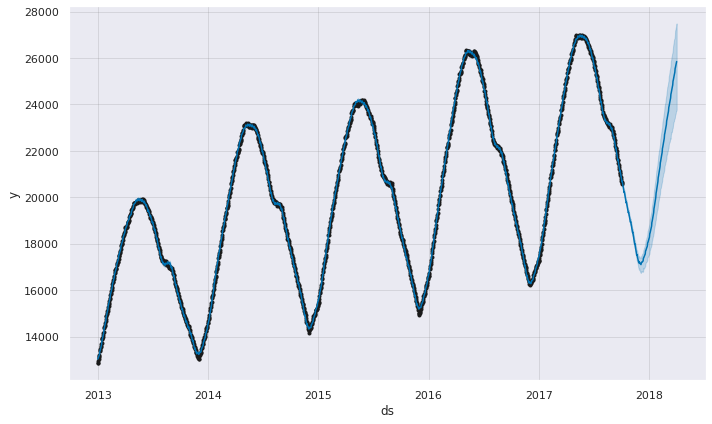

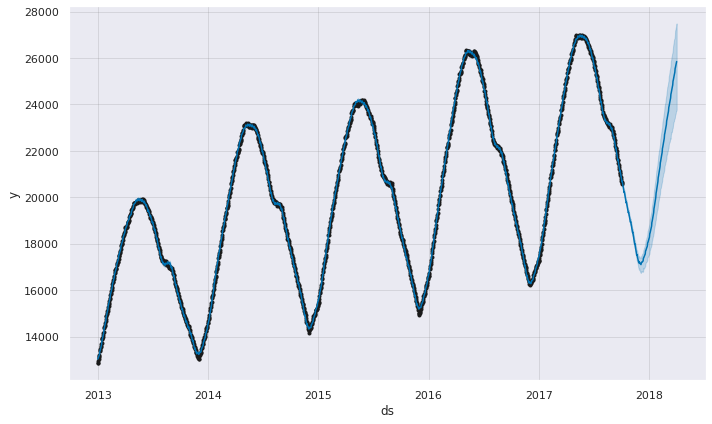

In [ ]:
model.plot(prediction )

In [ ]:
prediction['yhat']

0       13032.925785
1       13044.154735
2       13084.822276
3       13117.014292
4       13148.514501
            ...     
1912    25594.167744
1913    25667.179867
1914    25728.716745
1915    25786.424947
1916    25845.042984
Name: yhat, Length: 1917, dtype: float64

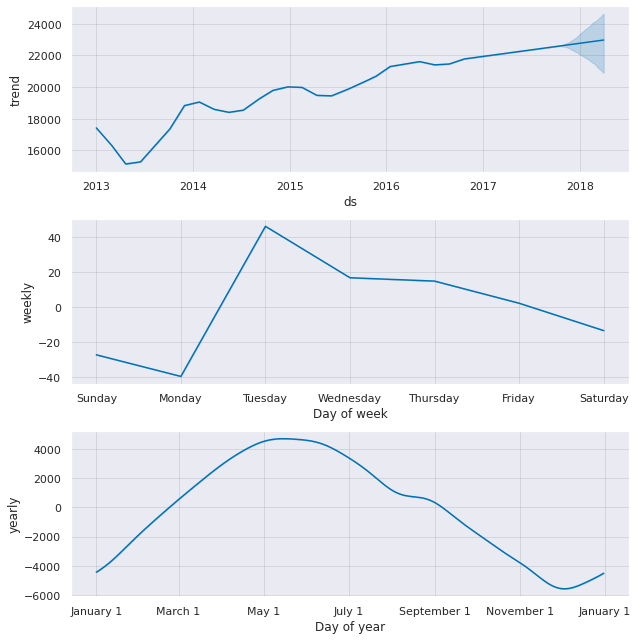

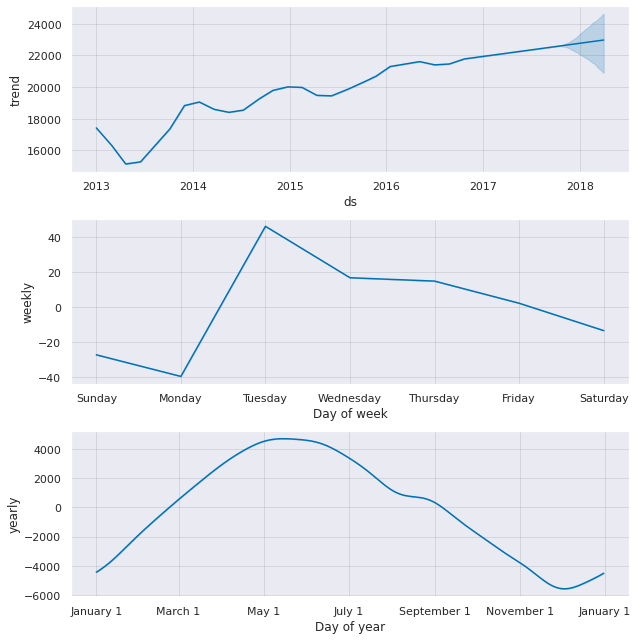

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-04-12 00:00:00 and 2016-10-03 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-04-13,23113.713022,23055.407080,23166.550815,23066.0,2015-04-12
1,2015-04-14,23243.463943,23183.506894,23301.164353,23206.0,2015-04-12
2,2015-04-15,23266.303120,23208.544384,23327.368779,23201.0,2015-04-12
3,2015-04-16,23311.803417,23256.971040,23374.744514,23226.0,2015-04-12
4,2015-04-17,23350.417550,23294.181431,23409.963273,23265.0,2015-04-12


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,33345.922597,182.608660,139.198806,0.007038,0.005235,0.383562
1,38 days,34772.641727,186.474239,141.848223,0.007205,0.005470,0.383562
2,39 days,36095.503336,189.988166,144.483587,0.007367,0.005554,0.386986
3,40 days,37355.440717,193.275556,146.769686,0.007509,0.005554,0.400685
4,41 days,38532.216041,196.296246,148.793589,0.007642,0.005570,0.414384


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-04-13,23113.713022,23055.407080,23166.550815,23066.0,2015-04-12
1,2015-04-14,23243.463943,23183.506894,23301.164353,23206.0,2015-04-12
2,2015-04-15,23266.303120,23208.544384,23327.368779,23201.0,2015-04-12
3,2015-04-16,23311.803417,23256.971040,23374.744514,23226.0,2015-04-12
4,2015-04-17,23350.417550,23294.181431,23409.963273,23265.0,2015-04-12
...,...,...,...,...,...,...
1455,2017-09-29,21746.641636,16125.331412,27788.170896,20796.0,2016-10-03
1456,2017-09-30,21673.451473,16074.930405,27647.738208,20704.0,2016-10-03
1457,2017-10-01,21602.989245,15966.192648,27608.040887,20642.0,2016-10-03
1458,2017-10-02,21532.464846,15859.229133,27608.135470,20578.0,2016-10-03


In [ ]:
prediction[1730:1737]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1730,2017-09-27,22548.781833,20958.574014,21132.626293,22548.781833,22548.781833,-1498.728770,-1498.728770,-1498.728770,16.738477,16.738477,16.738477,-1515.467247,-1515.467247,-1515.467247,0.0,0.0,0.0,21050.053063
1731,2017-09-28,22551.054524,20899.704312,21065.508554,22551.054524,22551.054524,-1567.850037,-1567.850037,-1567.850037,14.831981,14.831981,14.831981,-1582.682018,-1582.682018,-1582.682018,0.0,0.0,0.0,20983.204487
1732,2017-09-29,22553.327216,20822.964791,20991.351067,22553.327216,22553.327216,-1647.455112,-1647.455112,-1647.455112,2.248952,2.248952,2.248952,-1649.704064,-1649.704064,-1649.704064,0.0,0.0,0.0,20905.872104
1733,2017-09-30,22555.599907,20746.134490,20908.289677,22555.599907,22555.599907,-1729.962675,-1729.962675,-1729.962675,-13.322614,-13.322614,-13.322614,-1716.640061,-1716.640061,-1716.640061,0.0,0.0,0.0,20825.637232
1734,2017-10-01,22557.872599,20663.958059,20826.007431,22557.872599,22557.872599,-1810.693338,-1810.693338,-1810.693338,-27.109176,-27.109176,-27.109176,-1783.584162,-1783.584162,-1783.584162,0.0,0.0,0.0,20747.179261
1735,2017-10-02,22560.145290,20582.945133,20755.098322,22560.145290,22560.145290,-1890.004106,-1890.004106,-1890.004106,-39.389786,-39.389786,-39.389786,-1850.614320,-1850.614320,-1850.614320,0.0,0.0,0.0,20670.141184
1736,2017-10-03,22562.417981,20602.908886,20771.703059,22562.417981,22562.417981,-1871.787233,-1871.787233,-1871.787233,46.002166,46.002166,46.002166,-1917.789398,-1917.789398,-1917.789398,0.0,0.0,0.0,20690.630749


In [ ]:
agg_data['y']

0       12847.0
1       12848.0
2       12936.0
3       13019.0
4       13103.0
         ...   
1732    20796.0
1733    20704.0
1734    20642.0
1735    20578.0
1736    20610.0
Name: y, Length: 1737, dtype: float64

In [ ]:
test=pd.DataFrame({'date':agg_data.ds,'y_act':agg_data.y,'y_pred':prediction.yhat[0:1737]})

In [ ]:
test

,date,y_act,y_pred
0,2013-01-01,12847.0,13032.925785
1,2013-01-02,12848.0,13044.154735
2,2013-01-03,12936.0,13084.822276
3,2013-01-04,13019.0,13117.014292
4,2013-01-05,13103.0,13148.514501
...,...,...,...
1732,2017-09-29,20796.0,20905.872104
1733,2017-09-30,20704.0,20825.637232
1734,2017-10-01,20642.0,20747.179261
1735,2017-10-02,20578.0,20670.141184


In [ ]:
test['y_diff']=test.y_act-test.y_pred

In [ ]:
test[test['y_diff']>0]['y_diff'].sum()

43798.63070838948

In [ ]:
test[test['y_diff']<0]['y_diff'].sum()

-43791.59865765832

In [ ]:
p0=12500
p1=5
Amplitude=1000
pi=3.14
Phase=1
Period=365
X=np.arange(1736)

In [ ]:
import math
import scipy

In [ ]:
Y = (p0 + p1*np.array(X) + Amplitude*np.sin(2*pi*(np.array(X)-Phase)/Period)+3500*np.sin(2*2*(np.array(X)-Phase)/365)*1.2)
Y

array([12436.76889345, 12505.        , 12573.23110655, ...,
       20715.75842379, 20765.72571322, 20815.91741023])

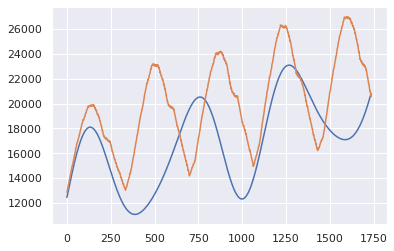

In [ ]:
plt.plot(Y)
plt.plot(agg_data.y)

In [ ]:
Y = p0 + p1*(X) + Amplitude*np.sin(2*pi*(X-Phase)/Period)+Amplitude*np.sin(2*pi*(X-Phase)/Period)

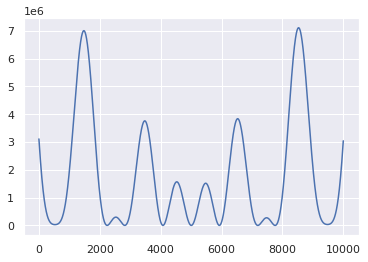

In [ ]:
plt.plot(Y)

In [ ]:
agg_data

,ds,y
0,2013-01-01,12847.0
1,2013-01-02,12848.0
2,2013-01-03,12936.0
3,2013-01-04,13019.0
4,2013-01-05,13103.0
...,...,...
1732,2017-09-29,20796.0
1733,2017-09-30,20704.0
1734,2017-10-01,20642.0
1735,2017-10-02,20578.0
